# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs
import helpers as hp
import matplotlib.pyplot as plt
import warnings

# Pretty display for notebooks
%matplotlib inline
%lsmagic

sns.set(color_codes=True)
# Load the wholesale customers dataset

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
np.warnings.filterwarnings('ignore')
random_state = 43
try:
    data = pd.read_csv("customers.csv")
    print('Data upload done')
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except Exception as ex:
    print("Dataset could not be loaded. Is the dataset missing? Exception: {}".format(ex))

Data upload done
Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: [UCI Description](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)
- **'Fresh'**: annual spending on fresh products (Continuous)
- **'Milk'**: annual spending on milk products (Continuous)
- **'Grocery'**: annual spending on grocery products (Continuous)
- **'Frozen'**: annual spending on frozen products (Continuous)
- **'Detergents_Paper'**: annual spending on detergents and paper products (Continuous)
- **'Delicatessen'**: annual spending on and delicatessen products (Continuous)

Consider what each category represents in terms of products you could purchase.

In [8]:
# Display a description of the dataset
hp.print_general_information("Print general info", data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


None

Get an overview of the data before we proceed:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


(440, 6)

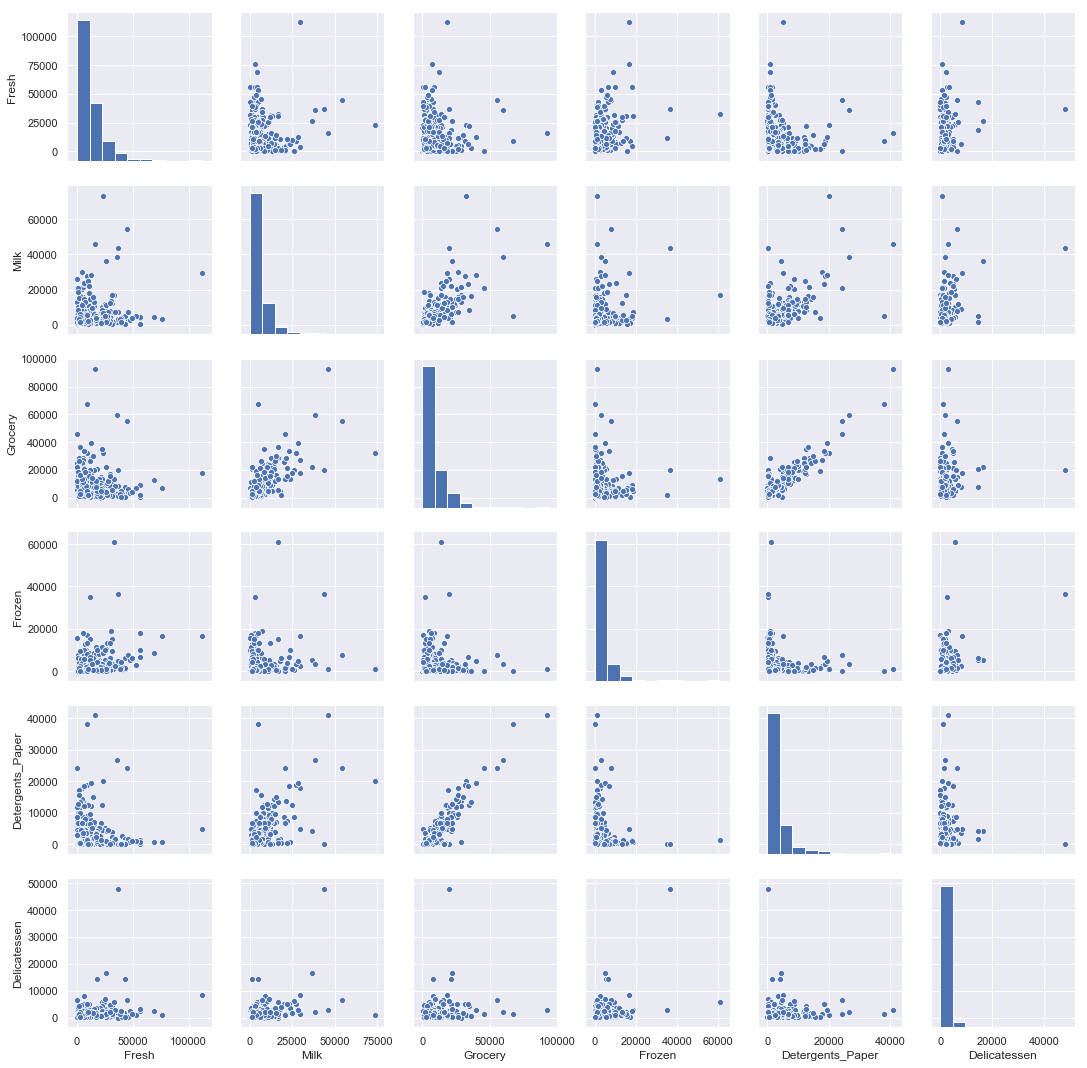

In [9]:
# Plotting pair plot just for fun
hp.display_pair_plot("Display pairplots", data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
338,0.012753,1.415636,29.847383,66.322323,0.063767,2.338137,100.0
95,0.028444,27.685598,59.277520,4.171802,2.114345,6.722291,100.0
218,0.051164,21.329695,43.219351,3.652540,13.635201,18.112049,100.0
66,0.071259,12.145685,58.725257,1.385590,27.458432,0.213777,100.0
65,0.091830,22.643201,49.510598,0.038893,26.178129,1.537348,100.0


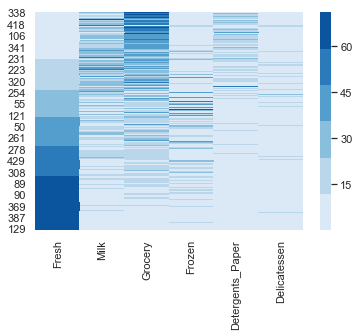

In [10]:
sorted_data = data.copy(deep=True)
# create a Total column to calculate total by row
sorted_data['Total'] = np.float64(sorted_data.sum(axis=1))
# For each column calculate the %
for key in sorted_data.keys():
    sorted_data[key] = np.float64(np.multiply(np.divide(sorted_data[key], sorted_data['Total']), 100))
sorted_data = sorted_data.sort_values(by=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])
display(sorted_data.head())
sns.heatmap(data = sorted_data.drop(['Total'], axis = 1), annot = False, robust = True, cbar = True, cmap = sns.color_palette("Blues"))

#### Naive Observations

- The average (mean) spend is as follows Fresh > Grocery > Milk > Frozen > Detergents Paper > delecatisseans. The other percentiles also follow nearly same trend.
- 5 of the 6 variables are food items. This means to get some more insight I can start with a percentage transformation. This will give me more insignt into who is consuming what kind of food and draw some conclusions.
- The spread of min and max for each items is quite large. The mean is no where near any of them. For example consider Fresh, min is 3 and max is 112151. Mean is ~12000. This is quite a large difference. We will need to transform the data so that this doesnt effect the learning and prediction. From the min value I am guessing that apart from grocery, deli, etc get ration from the whole sale delears there may be very few households getting their rations also.
- From the heat map we can see where the more spends are happening. As observed its looks same as Fresh > Grocery > Milk > Frozen/Detergents Paper (Cant pick one from the figure) > delecatisseans. Again this is just a rough assumption from the view.
- One thing I can think of is may be the foods are related in some way on what the establishment is like deli, or grocery store etc. But some questions remains on how the `Detergents Paper` is related to this.

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
49,4967,21412,28921,1798,13583,1163,71844.0
139,5387,4979,3343,825,637,929,16100.0
289,42786,286,471,1388,32,22,44985.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
49,6.913591,29.803463,40.255275,2.502645,18.906241,1.618785
139,33.459627,30.925466,20.763975,5.124224,3.956522,5.770186
289,95.111704,0.635767,1.047016,3.085473,0.071135,0.048905


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


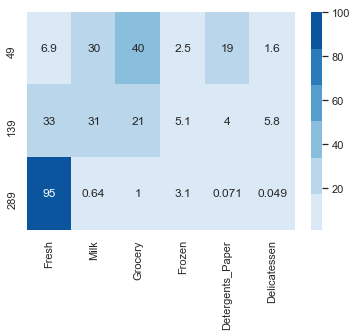

In [11]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# Logic of selecting the numbers: Selecting a number that is a prime (https://en.wikipedia.org/wiki/Wagstaff_prime) that is bit spread out to touch different quartiles
indices = [49, 139, 289]

# Create a DataFrame of the chosen samples
# samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
unsorted_data = data.copy(deep=True)
samples = pd.DataFrame(data.loc[indices], columns = data.keys())
samples['Total Spend'] = np.float64(samples.sum(axis=1))
print("Chosen samples of wholesale customers dataset:")
hp.display_html("Raw data")
display(samples)
samples = samples.drop(columns = ['Total Spend'])
# Display the heatmap too
selected_sorted_data = sorted_data.loc[indices].drop('Total', axis = 1)
hp.display_html("Data with Percentage")
display(selected_sorted_data)

# Print the general data here
hp.display_html("Described Data details")
unsorted_data['Total Spend'] = np.float64(unsorted_data.sum(axis=1))
display(unsorted_data.describe())
random_state = 43
sns.heatmap(data = selected_sorted_data, annot = True, robust = True, cbar = True, cmap = sns.color_palette("Blues"), vmin = 1, vmax = 100)
del sorted_data
del unsorted_data

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

To get a better understanding I will be comparing the heatmap/percentage with the described data. We can further plot pie plots or bar plots but with I believe with out that too we have enough to compare and contrast. The % gives insight of what consumption happens in what percentage among a signle index and the total number gives how radically or less it different from the mean.

- `Index 49`: The total spend is on the higher side (almost twice of mean). So this may not be a house hold. They sell 40% grocery and 30% milk. This seems like a grocery store. They also have some small quantity of other items.
- `Index 139`: Total spending is quite less than the mean, comes below the 25%. They consume fresh, milk and grocery. All of their spends are less then the respective means. This does not look like a big establishment. But like a small cafe.
- `Index 289`: The expenditure is more than mean. So this looks like a decent sized establishment. Almost 96% of the spending is on Fresh. So this looks like a Fresh market. Some one is going to buy so much of a single stuff if only they can distribute it further.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_score_for_vars(data, target_vars):
    random_state = 43
    print('Getting scores for following target variables: {}'.format(target_vars))
    for target_var in target_vars:
        # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
        dropped_data = data.drop([target_var], axis = 1, inplace = False)
        target_lable_data = data[target_var]
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(dropped_data, target_lable_data, test_size = 0.25, random_state = random_state)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state = random_state)
        regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        print('Score for "{}" as target variable: {}'.format(target_var, score))

target_vars = list(data.columns)
calculate_score_for_vars(data = data, target_vars = target_vars)

target_vars = ['Detergents_Paper']
# As pointed out in the naive observations I am curious to figure out how Detergents_Paper is related to food items
hp.display_html('Choosen target variable')
calculate_score_for_vars(data = data, target_vars = target_vars)

Getting scores for following target variables: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
Score for "Fresh" as target variable: -0.6772054628601678
Score for "Milk" as target variable: 0.17982000537497558
Score for "Grocery" as target variable: 0.5641583109941144
Score for "Frozen" as target variable: -0.3233442437486309
Score for "Detergents_Paper" as target variable: 0.13736984673376684
Score for "Delicatessen" as target variable: -0.0933478413777904


Getting scores for following target variables: ['Detergents_Paper']
Score for "Detergents_Paper" as target variable: 0.13736984673376684


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- The attempted feature that I tried to predict is `Detergents_Paper`.
- The score is `0.13736984673376684`.  The score for this is too low.
- The score is low for this so it is not a good idea to take it as a dependent variable. The score suggests that the other features cannot accurately predict the variation in the `Detergents_Paper`. So this feature is needed to predict. We cannot remove this.
- **Conclusion**: After looking at the other features and taking them out one by one as a dependent variable I can see that `Frozen`, `Delicatessen`, and `Fresh` has a negative score. This means the other features cannot predict these. So they have to be present. Similarly `Detergents_Paper` and `Milk` also has less score. So we cannot remove them from the free variable list too. Comparing others scores `Grocery` score is relatively high (0.57). So if needed this can be tried as a dependent variable to predict but still the score is not that high.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


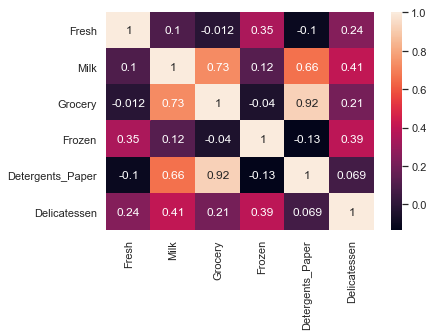

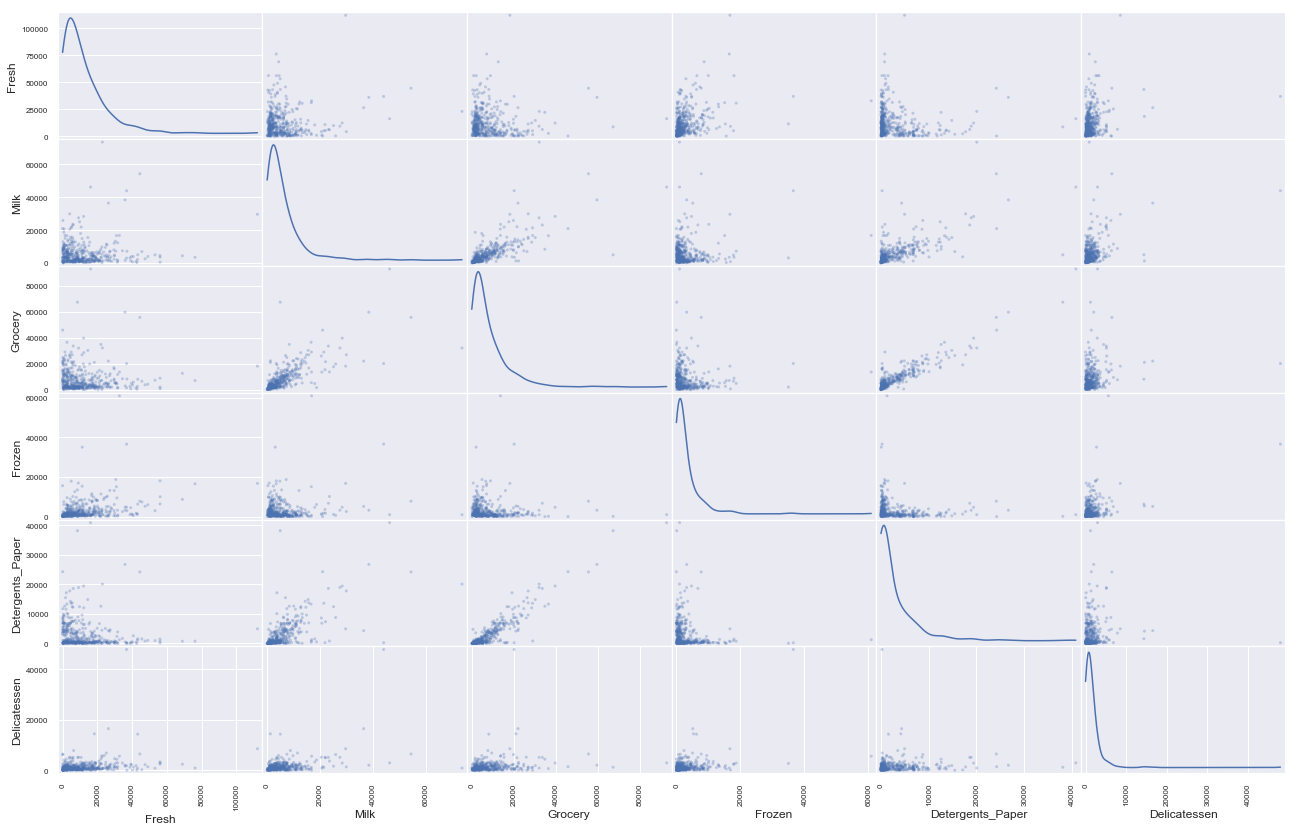

In [13]:
corr = data.corr()
display(corr)
sns.heatmap(corr, annot=True)

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(frame = data, alpha = 0.3, figsize = (22, 14), diagonal = 'kde', grid = True);

### Question 3
Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
Are there any pairs of features which exhibit some degree of correlation?
Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?
How is the data for those features distributed?

**Hint**: Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: data.corr()) to gain further insight.

**Answer:**

From the Scatter matrix and the correlation following are some observations that I made:

- `Grocery and Detergents_Paper` have the strongest correlation, then `grocery and milk` followed by  `Detergent Paper and Milk`.
- Grocery and Detergents_Paper seems to almost have a linear relation from the pairplot.
- From what I observe Grocery has almost high correlation with 2 items in the list, same stand for Detergents_Paper and milk but this is less than the scores that Grocery adds. These insights seems to sit well with the earlier claim that I made in the previous question that Grocery may not help us in finding anything extra about the datapoints. It seems to be related to the consumption of these other variables. 
- The distribution for the points seem highly skewed towards the origin, and this is not a normal profile. There are few outliers in the data and as I claimed earlier these outliers are further away from the mean. I assume from the data that small to lower medium sized outlets should be major players in the consumption.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

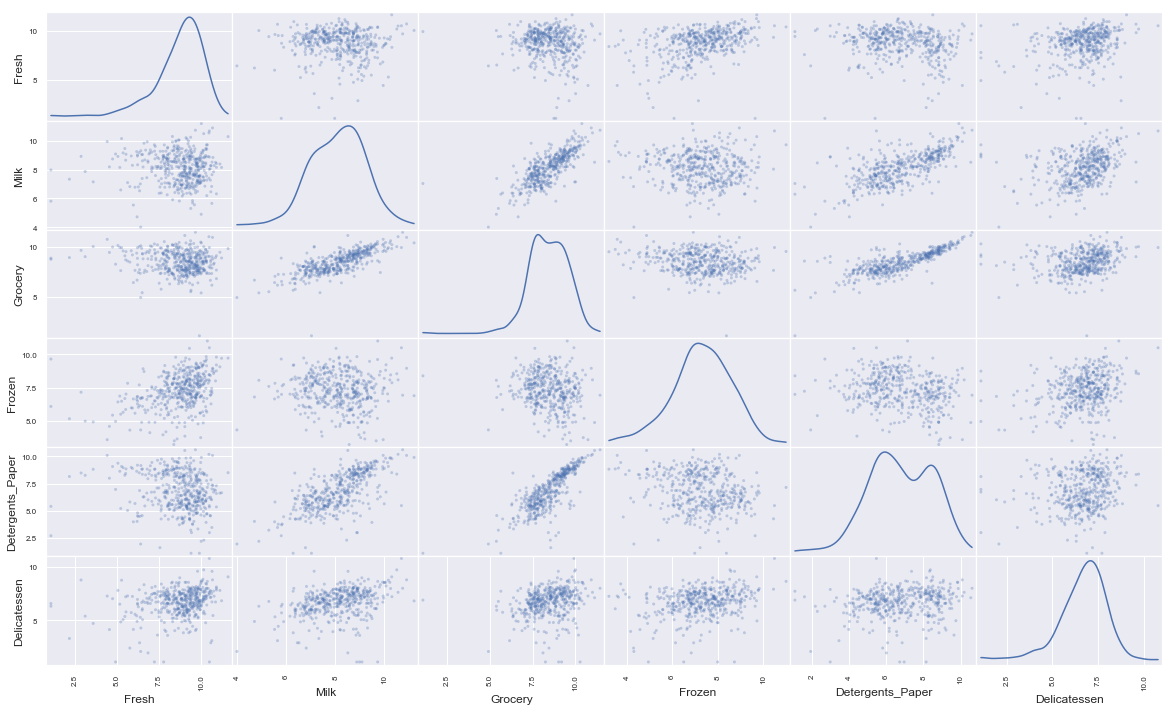

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data).copy()

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples).copy()

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (20,12), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
49,8.510571,9.971707,10.272323,7.494430,9.516574,7.058758
139,8.591744,8.512984,8.114624,6.715383,6.456770,6.834109
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


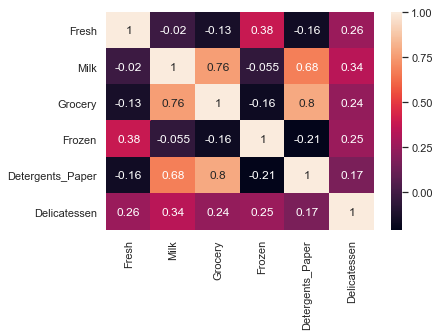

In [15]:
# Display the log-transformed sample data
display(log_samples)
# Draw the correlation matrix
corr = log_data.corr()
display(corr)
sns.heatmap(corr, annot=True)

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Outlier step: 2.533507868606793


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Numbers of outlier of "Fresh": 16


Outlier step: 2.318248272818475


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Numbers of outlier of "Milk": 4


Outlier step: 2.3988562137971394


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Numbers of outlier of "Grocery": 2


Outlier step: 2.3493275010092116


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Numbers of outlier of "Frozen": 10


Outlier step: 4.0893587609383335


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Numbers of outlier of "Detergents_Paper": 2


Outlier step: 2.2422806544219394


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Numbers of outlier of "Delicatessen": 14


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


All Outliers: [ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412  86  98
 154 356  75 154  38  57  65 145 175 264 325 420 429 439  75 161  66 109
 128 137 142 154 183 184 187 203 233 285 289 343], size: 48
Unique Outliers: [ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439], size: 42
Non-Unique Outliers: [ 65  66  75 128 154], size: 5
Org Data Shape: (440, 6)
Good data shape: (398, 6)


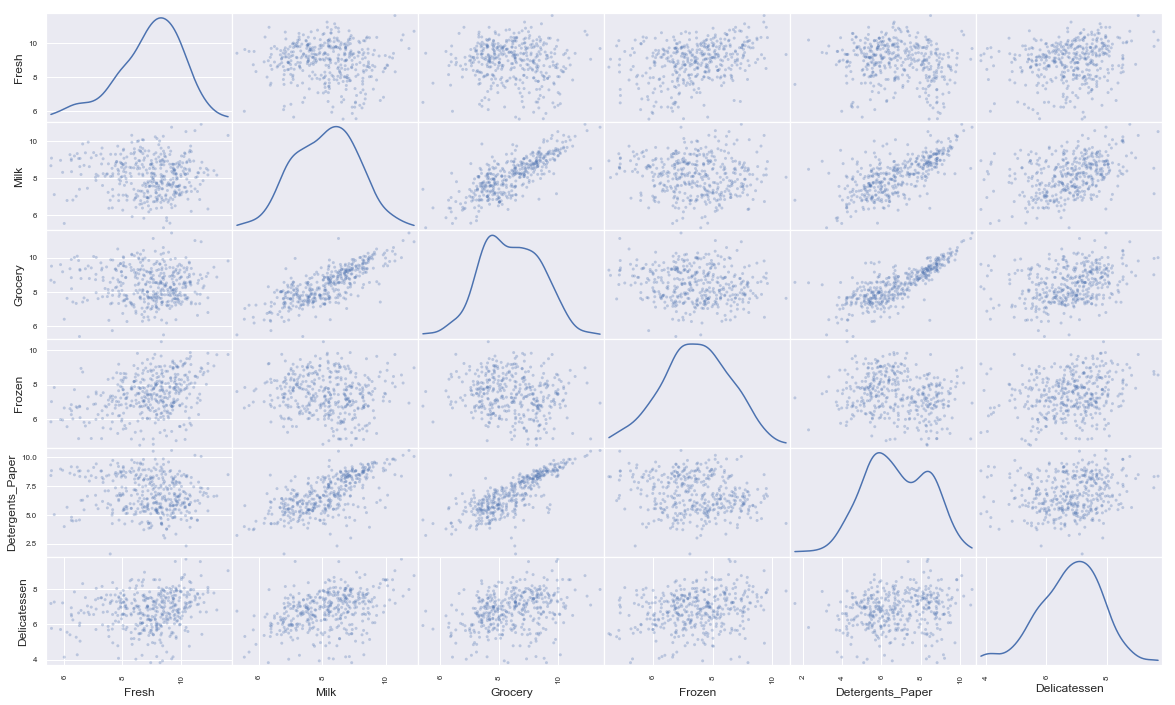

In [22]:
# For each feature find the data points with extreme high or low values
# OPTIONAL: Select the indices for data points you wish to remove
all_outliers = np.array([], dtype=np.int64)
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = np.multiply(1.5, np.subtract(Q3, Q1))
    
    # calculate the outlier and append
    current_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    # Append does not happen inplace, so we need to assign it again
    all_outliers = np.append(all_outliers, current_outlier.index.values)
    
    # Display the outliers
    hp.display_html("Data points considered outliers for the feature '{}':".format(feature))
    print('Outlier step: {}'.format(step))
    display(current_outlier)
    print('Numbers of outlier of "{}": {}'.format(feature, current_outlier.count()[feature]))


# Remove the outliers, if any were specified. Here I am removing duplicate outliers.
unique_outliers = np.unique(all_outliers)
# return the indices of the unique array also
dup_outliers, indices = np.unique(all_outliers, return_inverse=True)
# Count number of occurrences of each value. Get the duplicate set
dup_outliers = dup_outliers[np.bincount(indices)>1]
# good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)
good_data = log_data.drop(log_data.index[all_outliers]).reset_index(drop = True)
hp.display_html('Good data')
display(good_data.head())
hp.display_html('Outliers')
print('All Outliers: {}, size: {}'.format(all_outliers, all_outliers.size))
print('Unique Outliers: {}, size: {}'.format(unique_outliers, unique_outliers.size))
print('Non-Unique Outliers: {}, size: {}'.format(dup_outliers, dup_outliers.size))
print('Org Data Shape: {}'.format(data.shape))
print('Good data shape: {}'.format(good_data.shape))
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (20,12), diagonal = 'kde');

Removed all of the outliers form the data and then plotting the same scatter matrix.

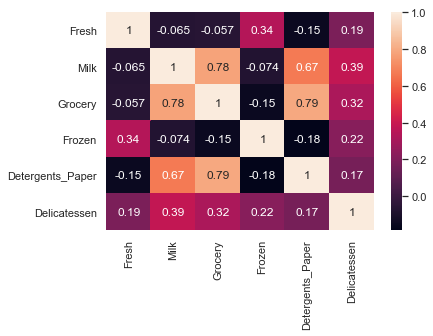

In [23]:
# Just checking what is the impact on the corr after removing the outliers
sns.heatmap(good_data.corr(), annot=True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

**Hint:** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

- The 5 duplicate (65  66  75 128 154) outliers should be removed as they are outliers in multiple features.
- I tested with removing only these outliers and all the outliers. The correlation matrix did not change much and the outlier count is around 42 so removing all of them for now. We may not always want to remove all of the outliers. Some of them may be legitimate dataset
- Some of the so called outliers are due to low datapoints, this is the reason they fall below the interquartile range. If we add more datapoints they may not be outliers. Removing everything from the dataset may give a good graph but it may not help in a better prediction as we are removing the relevent data too. We have to be careful in this. `Outliers to drop or not to drop` in the reference section gives some more details on how to go about it.
- Currently I am going to analyze by dropping all of the outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cumsum
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579,49.93
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634,72.52
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422,83.01
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445,92.79
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120,97.67
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094,100.00


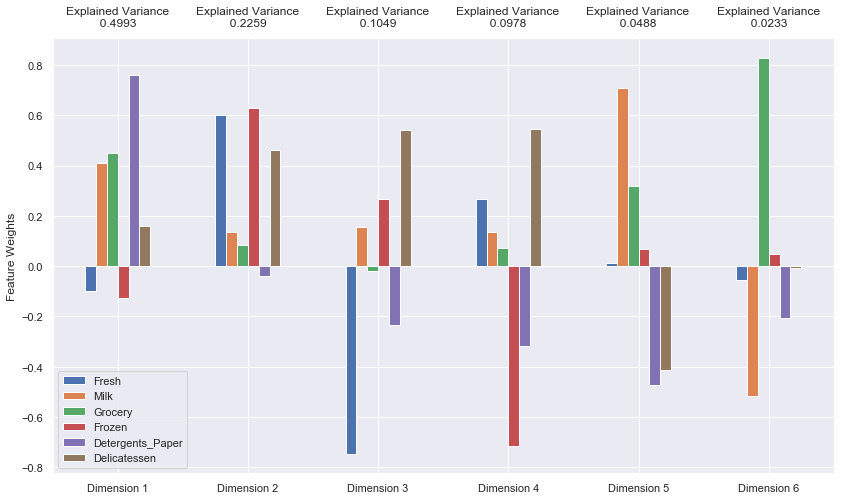

In [24]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components = 6, random_state = random_state, whiten = False).fit(good_data)
# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
# Clone it and do the operation on the clone. Keep the original untouched. Changing the original has caused problem in past for me
pca_results_clone = pca_results.copy(deep=True)
pca_results_clone['Cumsum'] = np.multiply(100, pca_results_clone['Explained Variance'].cumsum())
display(pca_results_clone)
del pca_results_clone

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- $70.68$% of variance is explained in total by the $1^{st}$ and $2^{nd}$ principle component.
- $93.11$% of variance is explained by the first 4 principal components
- **Dimensions**:
    * `Dimension 1:` This dimension has strong correlation with `Milk, Grocery and Detergents_Paper`. The stands in accordance with my earlier observation. These items vary with some strong correlation and one value seems to be deducable from the other to some extent. Consiering they are related these may be data from retail store.
    * `Dimension 2:` This dimension shows stron correlation with `Fresh, Frozen, and Delicatessen`. This is orthogonal to the features in dimension 1. As per this I feel this can be data from some sort of resturant or cafe.
    * `Dimension 3:` The Fresh spending here has been drastically different. I would say it has decreased from Dimension 1 and also that the Detergents_Paper spend has also decreased. The `Delicatessen` has increased a lot. There is some expendeture on the Frozen. This looks like this is not an outlet that deals with fresh produce. This may be a dataset that gives more insights about cafe or like icecream parlors or sweet shops.
    * `Dimension 4:` This dimension has increased spending in `Fresh, and Delicatessen` and drastically reduced expenditure on `Frozen`. I believe this dimension represents food joints where we can get something like sandwitch and sweets for a quick meal.
    * `Dimension 5:` This dimension has shown increased consumption of `Milk and Grocery`. This dimension represents something like smoothy shows etc.
    * `Dimension 6"` This dimension seems to represent grocery shops.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [25]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.7428,0.2151,0.0792,-0.4946,0.5008,0.0302
1,-0.0975,-0.5995,0.2263,0.5726,0.2722,-0.4007
2,-5.2868,-1.2073,-2.9073,-0.8716,0.6428,0.0277


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [28]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, random_state = random_state, whiten = False).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

,Dimension 1,Dimension 2
0,3.7428,0.2151
1,-0.0975,-0.5995
2,-5.2868,-1.2073


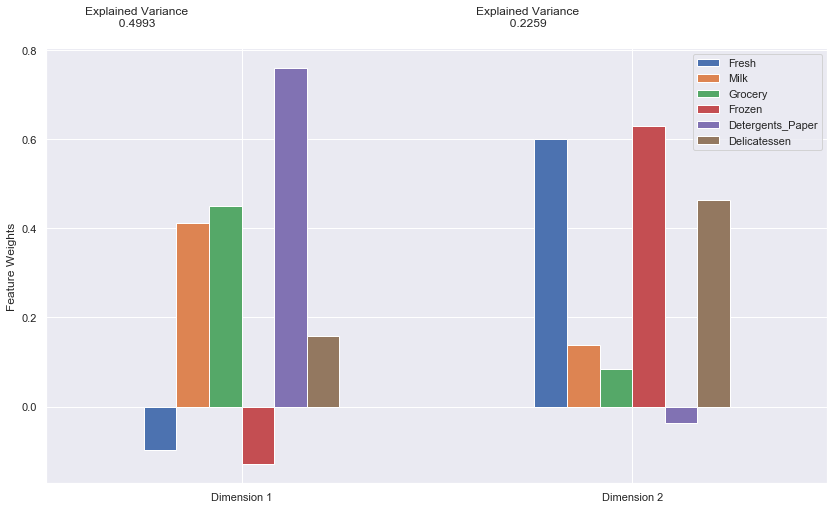

In [32]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
pca_results = vs.pca_results(good_data, pca)

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

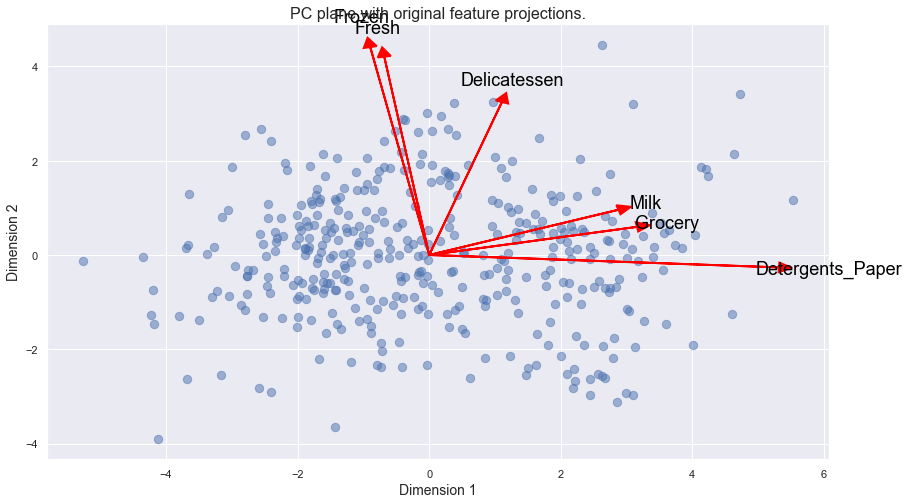

In [30]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Hint:** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = None

# TODO: Predict the cluster for each data point
preds = None

# TODO: Find the cluster centers
centers = None

# TODO: Predict the cluster for each transformed sample data point
sample_preds = None

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = None

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
# TODO: Inverse transform the centers
log_centers = None

# TODO: Exponentiate the centers
true_centers = None

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

**Answer:**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Reference
- [Heatmaps](https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn)
- [Visualizing Data with Pair plots in Python](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
- [Pandas & Seaborn - A guide to handle & visualize data in Python](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/)
- [Pandas Groupby Tutorial](https://www.marsja.se/python-pandas-groupby-tutorial-examples/)
- [Pandas dataframe tutorial](https://www.marsja.se/pandas-dataframe-read-csv-excel-subset/)
- [Reshaping in pandas, pivot table, stack and unstack](https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)
- [Selecting dataframe rows and columns using iloc, loc and ix](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)
- [Pandas hierarchical indexing](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html)
- [Wagstaff prime](https://en.wikipedia.org/wiki/Wagstaff_prime)
- [Customer Segmentation](https://labs.openviewpartners.com/customer-segmentation/)
- [Introduction to correlation](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials)
- [Summerizing data and trkey method](http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html)
- [3 Methods to deal with outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html)
- [A Review and Comparison of Methods for Detecting Outliers in Univariate Data Sets ](http://d-scholarship.pitt.edu/7948/1/Seo.pdf)
- [Why John Tukey set 1.5 IQR to detect outliers instead of 1 or 2?](https://math.stackexchange.com/questions/966331/why-john-tukey-set-1-5-iqr-to-detect-outliers-instead-of-1-or-2)
- [Outliers: Finding Them in Data, Formula, Examples](https://www.statisticshowto.datasciencecentral.com/find-outliers/)
- [Outliers to drop or not to drop](http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)
- [Advantage and disadvantage of k-means](http://playwidtech.blogspot.com/2013/02/k-means-clustering-advantages-and.html)
- [Advantages & Disadvantages of k-Means and Hierarchical clustering](http://stp.lingfil.uu.se/~santinim/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf)
- [K means advantage](https://www.quora.com/What-are-the-advantages-of-K-Means-clustering)
- [Disadvantage of K-means](https://www.inovex.de/blog/disadvantages-of-k-means-clustering/)
- [Pros and Cons of K-Means](https://www.prosancons.com/education/pros-and-cons-of-k-means-clustering/)
- [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
- [Ream time network anamoly detection in computer network](https://www.inovex.de/blog/real-time-detection-of-anomalies-in-computer-networks-with-methods-of-machine-learning/)